In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
# displays top 5 rows in the dataset

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking the data dimension

titanic_df.shape

(891, 12)

In [5]:
# checking the datatypes of every column

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# printing the information of the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Summary of the dataset

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Checking for null values, if any

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# first check the percentage of missing columns by this code .

percent_missing=titanic_df.isnull().sum()*100/len(titanic_df)
percent_missing

#if you find 80% missing values then drop that column .

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

There are NULL values for columns Age and Cabin. 
As we can see 19% of Age data is missing, it can be replaced with some form of imputation
and 77% of Cabin data has NULL values

# Treating the null values for Age column

Null Values can be treated in different ways. As Age is continous data , it can be treated with simple imputation technique i.e. mean

In [10]:

meanval = titanic_df['Age'].mean()
titanic_df['Age'].fillna(meanval,inplace=True)

In [11]:
titanic_df['Age'].isnull().sum()

0

Now, The column Age has 0 columns with NaN i.e., no columns with null values

# Treating the null values for Embarked column

In [12]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
titanic_df['Embarked'].nunique()

3

To FIll the missing values, the imputation technique mode() is applied as Embarked column is Nominal data

In [14]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
modeval = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(modeval,inplace=True)

In [16]:
# checking the null values in embarked column after removing null

titanic_df['Embarked'].isnull().sum()

0

# Treating the null values for Cabin column

As we can observe that 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable i.e, drop the column

In [17]:
titanic_df.drop('Cabin', axis=1,inplace=True)

In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
titanic_df.shape

(891, 11)

In [20]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Data Visualization

For Nominal Catetgorical data, count plot is used that gives the frequencyof the classes

male      577
female    314
Name: Sex, dtype: int64


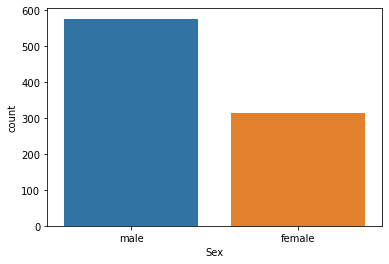

In [21]:
ax = sns.countplot(x='Sex', data=titanic_df)
print(titanic_df['Sex'].value_counts())

In [22]:
titanic_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

3    491
1    216
2    184
Name: Pclass, dtype: int64


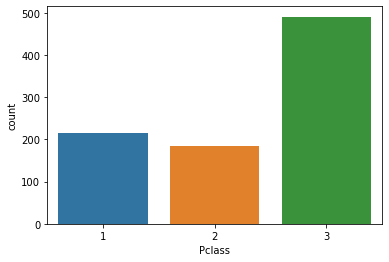

In [23]:
ax = sns.countplot(x='Pclass', data=titanic_df)
print(titanic_df['Pclass'].value_counts())

We can see that More passengers belong to class 3

In [24]:
titanic_df['Survived'].unique()

array([0, 1], dtype=int64)

0    549
1    342
Name: Survived, dtype: int64


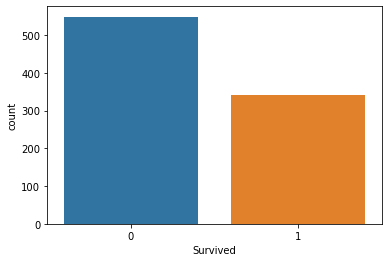

In [25]:
ax = sns.countplot(x='Survived', data=titanic_df)
print(titanic_df['Survived'].value_counts())

We observe that many people didn't survive i.e., 549 dead and 342 survived

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


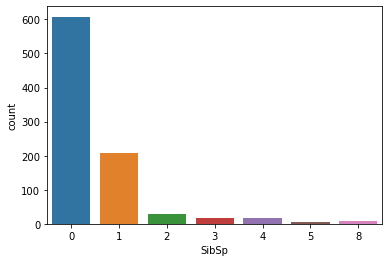

In [26]:
ax = sns.countplot(x='SibSp', data=titanic_df)
print(titanic_df['SibSp'].value_counts())

There are 608 passengers with no(0) Sibling/spouse with them 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


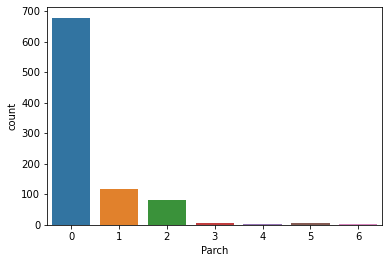

In [27]:
ax = sns.countplot(x='Parch', data=titanic_df)
print(titanic_df['Parch'].value_counts())

We can see that 678 passengers have no parent/child travelling with them

<AxesSubplot:xlabel='Survived', ylabel='count'>

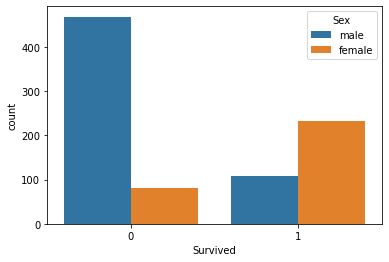

In [28]:
# Bivariate Analysis

sns.countplot(x="Survived", hue="Sex", data=titanic_df)

Among the survivors many are female and more number of male were not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

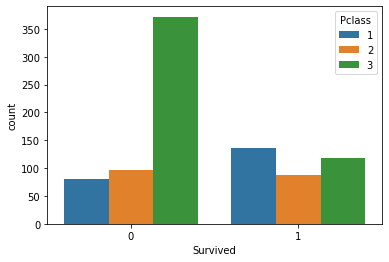

In [29]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_df)

Many class 3 passengers didn't survive than other two class passengers

# checking the distribution of continous values of float type columns

In [30]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

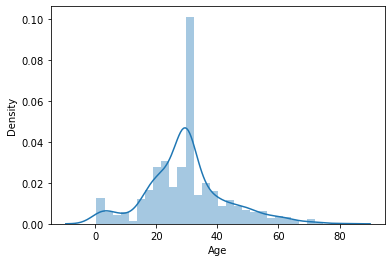

In [31]:
sns.distplot(titanic_df['Age'],kde=True)
plt.show()

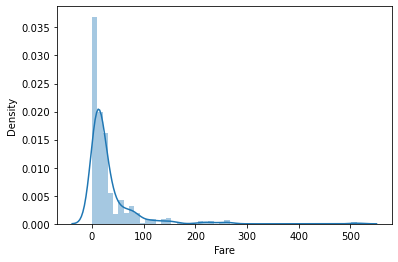

In [32]:
sns.distplot(titanic_df['Fare'],kde=True)
plt.show()

In [33]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Converting Categorical Features

Categorical features need to be converted as machine do not understand

In [34]:
pd.get_dummies(titanic_df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
d_sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
d_embark = pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [36]:
titanic_df.drop(['Sex','Embarked'],axis=1,inplace=True)

As we created dummy variables for columns Sex and Embarked, dropping those column from dataset and later add the dummy varibales to the dataset

In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


Also the columns PassengerId,Name and Ticket do not add much value to predict in algorithm, can be dropped

In [38]:
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [39]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Now, adding dummy variables to the dataset

In [40]:
titanic_df = pd.concat([titanic_df,d_sex,d_embark],axis=1)

In [41]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [43]:
titanic_df.shape

(891, 9)

# corelation betwen feature and target variable

In [44]:
titanic_df.corr()['Survived'].sort_values()

male       -0.543351
Pclass     -0.338481
S          -0.149683
Age        -0.069809
SibSp      -0.035322
Q           0.003650
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Almost all variables are contibuting less for predicting target variable

# Checking the columns which are positively and negative correltaed with the target columns

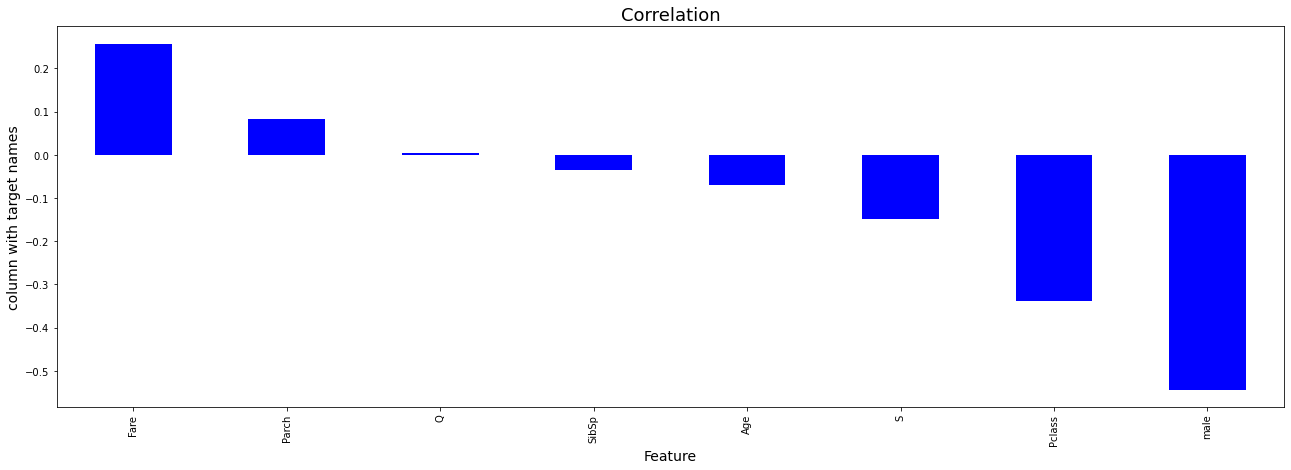

In [45]:
plt.figure(figsize=(22,7))
titanic_df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='blue')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

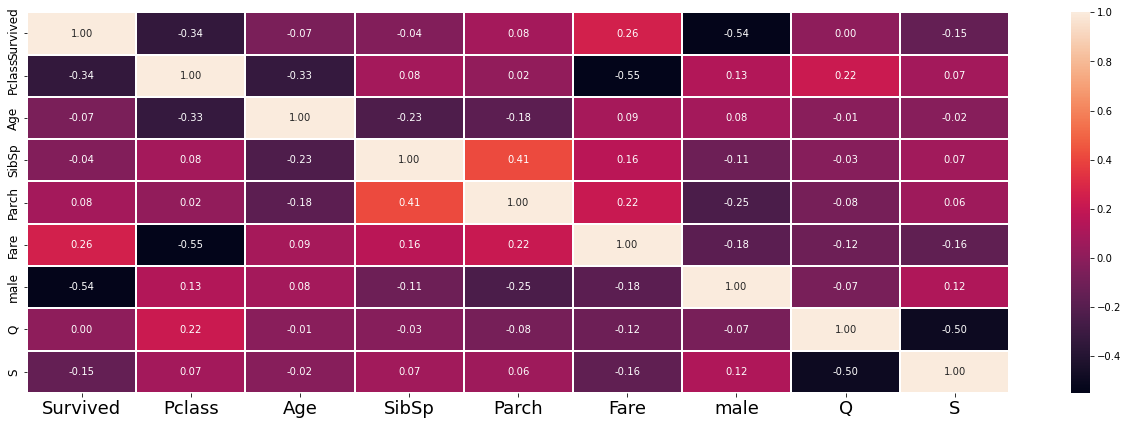

In [46]:
# heatmap for correlation

plt.figure(figsize=(22,7))
sns.heatmap(titanic_df.corr(),annot=True,linewidth=0.1,fmt='0.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

# Checking outliers



In [47]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
dtype: object

<AxesSubplot:>

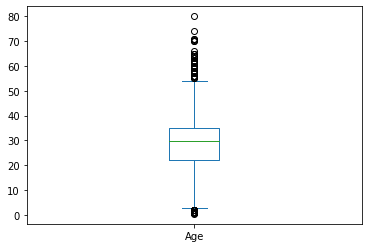

In [48]:
titanic_df['Age'].plot.box()

<AxesSubplot:>

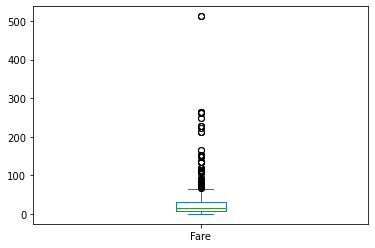

In [49]:
titanic_df['Fare'].plot.box()

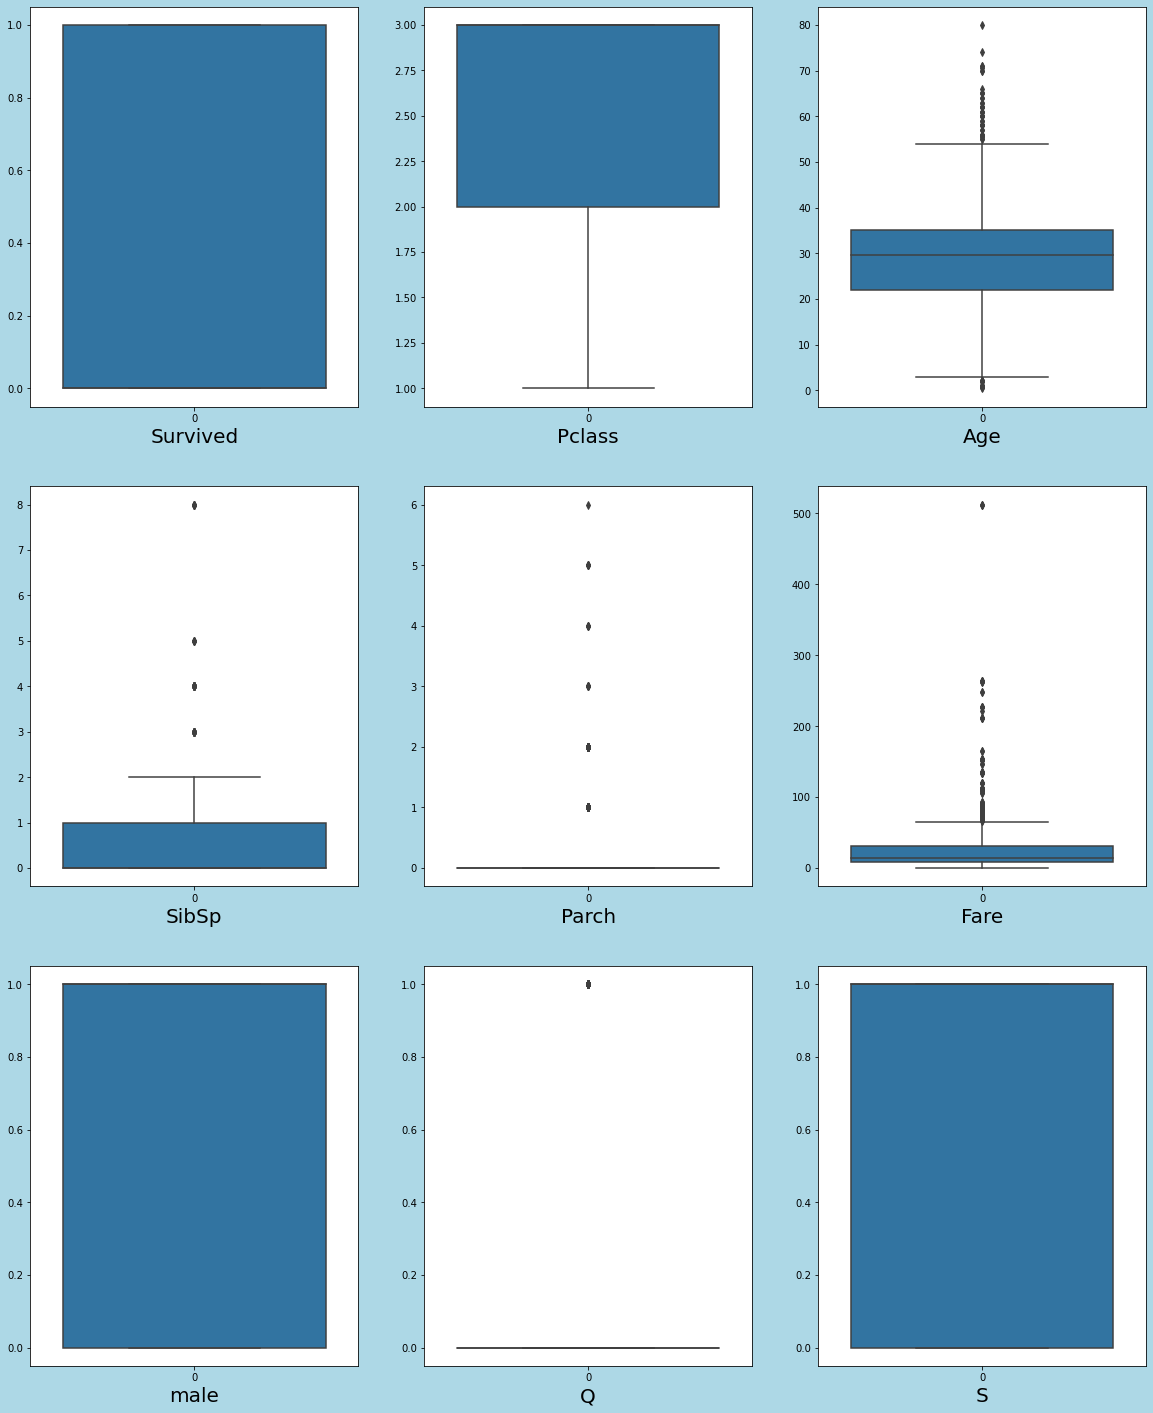

In [50]:
# Now visualize data for outliers using boxplot

plt.figure(figsize=(20,25), facecolor='lightblue')
plotnumber = 1

for column in titanic_df:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data = titanic_df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

Since Age and Fare column are continous and have outliers, they will be treated and the rest all are categorical columns, so need to remove outliers

# Distribution graph for continous data

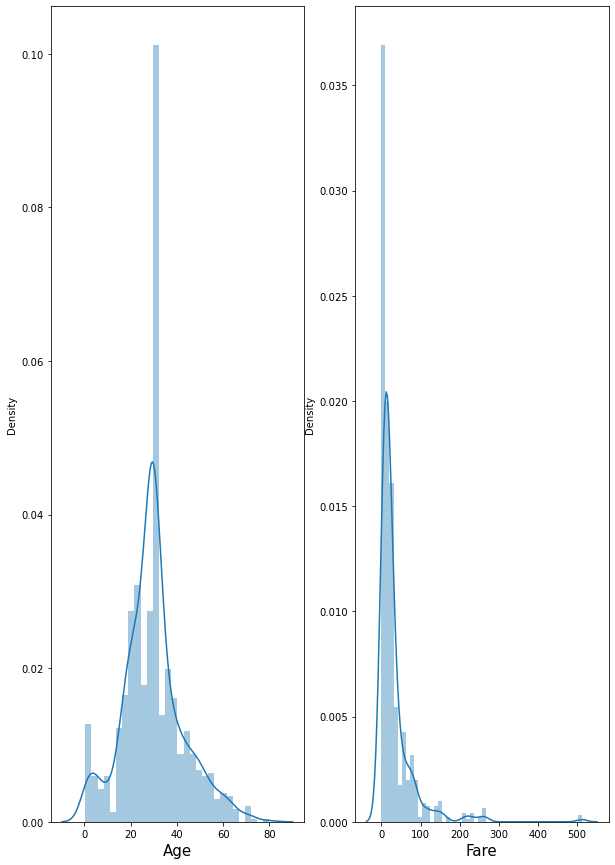

In [51]:
plt.figure(figsize=(10,15))
plotnumber = 1
for col in titanic_df[['Age','Fare']]:
    if plotnumber <=2:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(titanic_df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.show()

# Removing outliers 

Zscore Technique:

In [52]:
# with satndard deviation 3

from scipy.stats import zscore
zs = zscore(titanic_df[['Age','Fare']])
abs_zscore = np.abs(zs)
filtering_entry = (abs_zscore < 3).all(axis=1)
titanic_df = titanic_df[filtering_entry]
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,2.343750,29.322935,0.520833,0.368056,26.500689,0.650463,0.087963,0.733796
std,0.485287,0.819028,12.490450,1.104937,0.794651,29.400192,0.477100,0.283405,0.442228
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.860400,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.775000,1.000000,0.000000,1.000000
max,1.000000,3.000000,66.000000,8.000000,6.000000,164.866700,1.000000,1.000000,1.000000


In [53]:
titanic_df.shape

(864, 9)

In [54]:
data_loss = ((891-864)/891)*100
data_loss

3.0303030303030303

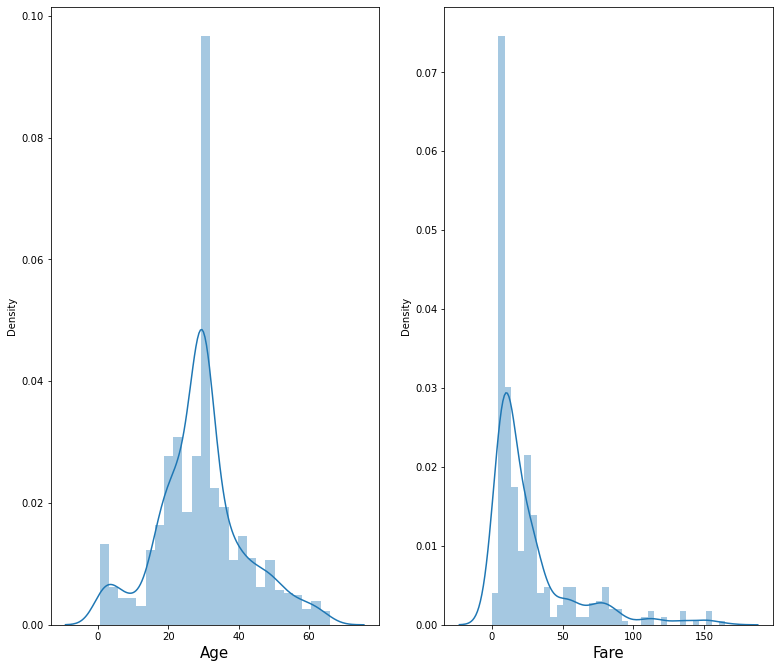

In [55]:
# let's see now how data is distributed for every column after removing outliers

plt.figure(figsize=(20,25))
plotnumber = 1
for col in titanic_df[['Age','Fare']]:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(titanic_df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber +=1
plt.show()

In [79]:
# Splitting data into features and labels

In [56]:
x = titanic_df.drop(columns = ['Survived'])
y = titanic_df['Survived']

In [57]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

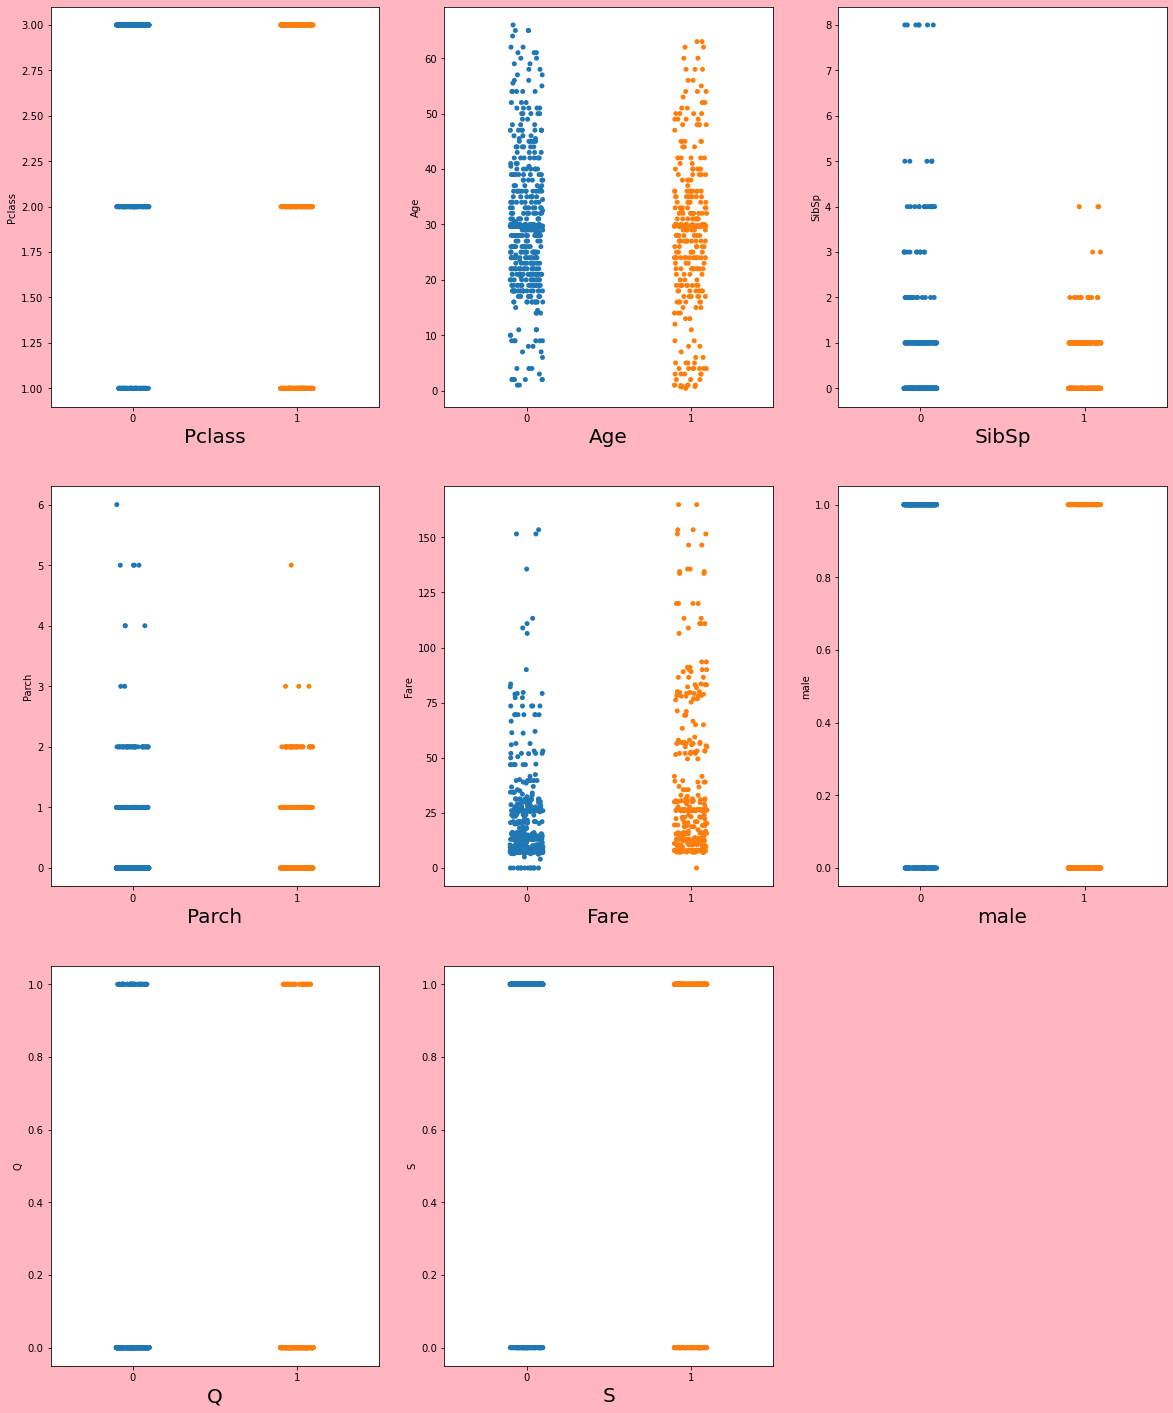

In [80]:
# let's see now how features are related to class

plt.figure(figsize=(20,25), facecolor='lightpink')
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

In [81]:
x.skew()

Pclass   -0.708375
Age       0.239002
SibSp     3.751753
Parch     2.840412
Fare      2.257178
male     -0.632203
Q         2.914507
S        -1.059810
dtype: float64

The ideal value of skewness is 0. The threshold value is +/-0.65. Skewness is also considered for continous data not for categorical data and so columns Age and Fare columns are being considered to remove skewness

In [89]:
from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')
x

array([[ 0.8648797 , -0.55946309,  1.44485525, ...,  0.7330529 ,
        -0.31055869,  0.60230891],
       [-1.36016231,  0.70517243,  1.44485525, ..., -1.36415804,
        -0.31055869, -1.66027761],
       [ 0.8648797 , -0.23397339, -0.68318283, ..., -1.36415804,
        -0.31055869,  0.60230891],
       ...,
       [ 0.8648797 ,  0.06103324,  1.44485525, ..., -1.36415804,
        -0.31055869,  0.60230891],
       [-1.36016231, -0.23397339, -0.68318283, ...,  0.7330529 ,
        -0.31055869, -1.66027761],
       [ 0.8648797 ,  0.24185449, -0.68318283, ...,  0.7330529 ,
         3.22000327, -1.66027761]])

In [91]:
pd.DataFrame(x).skew()

0   -0.339953
1   -0.012043
2    0.782636
3    1.275494
4   -0.201805
5   -0.632203
6    2.914507
7   -1.059810
dtype: float64

Now, Let's fit the data to the model, Before that, data is to be split into train and test

# Train and Test split

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, roc_auc_score

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y , test_size=0.20,random_state=3)

In [105]:
# learns the pattern/ training

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_pred = log_reg.predict(x_test)

In [107]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [108]:
# model accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8208092485549133

In [109]:
# confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[98, 16],
       [15, 44]], dtype=int64)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       114
           1       0.73      0.75      0.74        59

    accuracy                           0.82       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.82      0.82      0.82       173



In [111]:
# ROC curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [112]:
print("Threshold = ", thresholds)
print("True Positive Rate(TPR) = ", tpr)
print("False Positive Rate(FPR) = ", fpr)

Threshold =  [2 1 0]
True Positive Rate(TPR) =  [0.         0.74576271 1.        ]
False Positive Rate(FPR) =  [0.         0.14035088 1.        ]


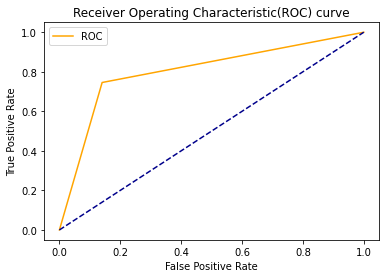

In [113]:
# plotting ROC curve

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) curve')
plt.legend()
plt.show()

In [103]:
# How much area is it covering (AUC - Area Under Curve)

auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.7852004110996917

# Cross Validationn score

In [115]:
pred_lr = log_reg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(log_reg,x,y,cv=j)
    lsc = lsscore.mean()
    print("At CV:",j)
    print("Cross validation score is",lsc*100)
    print("Accuracy score is ",lss*100)
    print("\n")

At CV: 2
Cross validation score is 76.50462962962963
Accuracy score is  82.08092485549133


At CV: 3
Cross validation score is 79.2824074074074
Accuracy score is  82.08092485549133


At CV: 4
Cross validation score is 79.5138888888889
Accuracy score is  82.08092485549133


At CV: 5
Cross validation score is 79.51404758704128
Accuracy score is  82.08092485549133


At CV: 6
Cross validation score is 79.05092592592592
Accuracy score is  82.08092485549133


At CV: 7
Cross validation score is 79.51369375444906
Accuracy score is  82.08092485549133


At CV: 8
Cross validation score is 79.39814814814815
Accuracy score is  82.08092485549133


At CV: 9
Cross validation score is 79.74537037037037
Accuracy score is  82.08092485549133




In [116]:
lsscore_selctd = cross_val_score(log_reg,x,y,cv=9).mean()
print("The CV score is:",lsscore_selctd)
print("The Accuracy score  is:", lss)

The CV score is: 0.7974537037037037
The Accuracy score  is: 0.8208092485549133


# Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [119]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
dt_train_predict = dt.predict(x_train)
dt_test_predict = dt.predict(x_test)

In [121]:
print(classification_report(y_train,dt_train_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       423
           1       1.00      0.96      0.98       268

    accuracy                           0.98       691
   macro avg       0.99      0.98      0.98       691
weighted avg       0.98      0.98      0.98       691



In [122]:
print(classification_report(y_test,dt_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       114
           1       0.73      0.73      0.73        59

    accuracy                           0.82       173
   macro avg       0.79      0.79      0.79       173
weighted avg       0.82      0.82      0.82       173



In [123]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

# Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
rfc_train_predict = rfc.predict(x_train)
rfc_test_predict = rfc.predict(x_test)

In [127]:
print(classification_report(y_train,rfc_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       423
           1       0.99      0.97      0.98       268

    accuracy                           0.98       691
   macro avg       0.98      0.98      0.98       691
weighted avg       0.98      0.98      0.98       691



In [128]:
print(classification_report(y_test,rfc_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       114
           1       0.76      0.80      0.78        59

    accuracy                           0.84       173
   macro avg       0.82      0.83      0.83       173
weighted avg       0.85      0.84      0.84       173

